# 1. Explore the dataset to understand the characteristics and distributions of different features.

# import all liberaries here

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

In [2]:
import csv

# Open the TXT file for reading
with open('Dataset.txt', 'r') as txt_file:

    # Open the CSV file for writing
    with open('Dataset.csv', 'w', newline='') as csv_file:

        # Create a CSV writer object
        writer = csv.writer(csv_file)

        # Read each line in the TXT file and write it to the CSV file
        for line in txt_file:
            # Split the line by the delimiter (replace with your preferred delimiter)
            row = line.split(',')

            # Write the row to the CSV file
            writer.writerow(row)

In [3]:
# Load the dataset
dataset = pd.read_csv('Dataset.csv')


In [4]:
# Print the first few rows of the dataset
dataset.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance\n
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
# Display some basic statistics about the dataset
print(dataset.describe())

           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.00000

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance\n
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


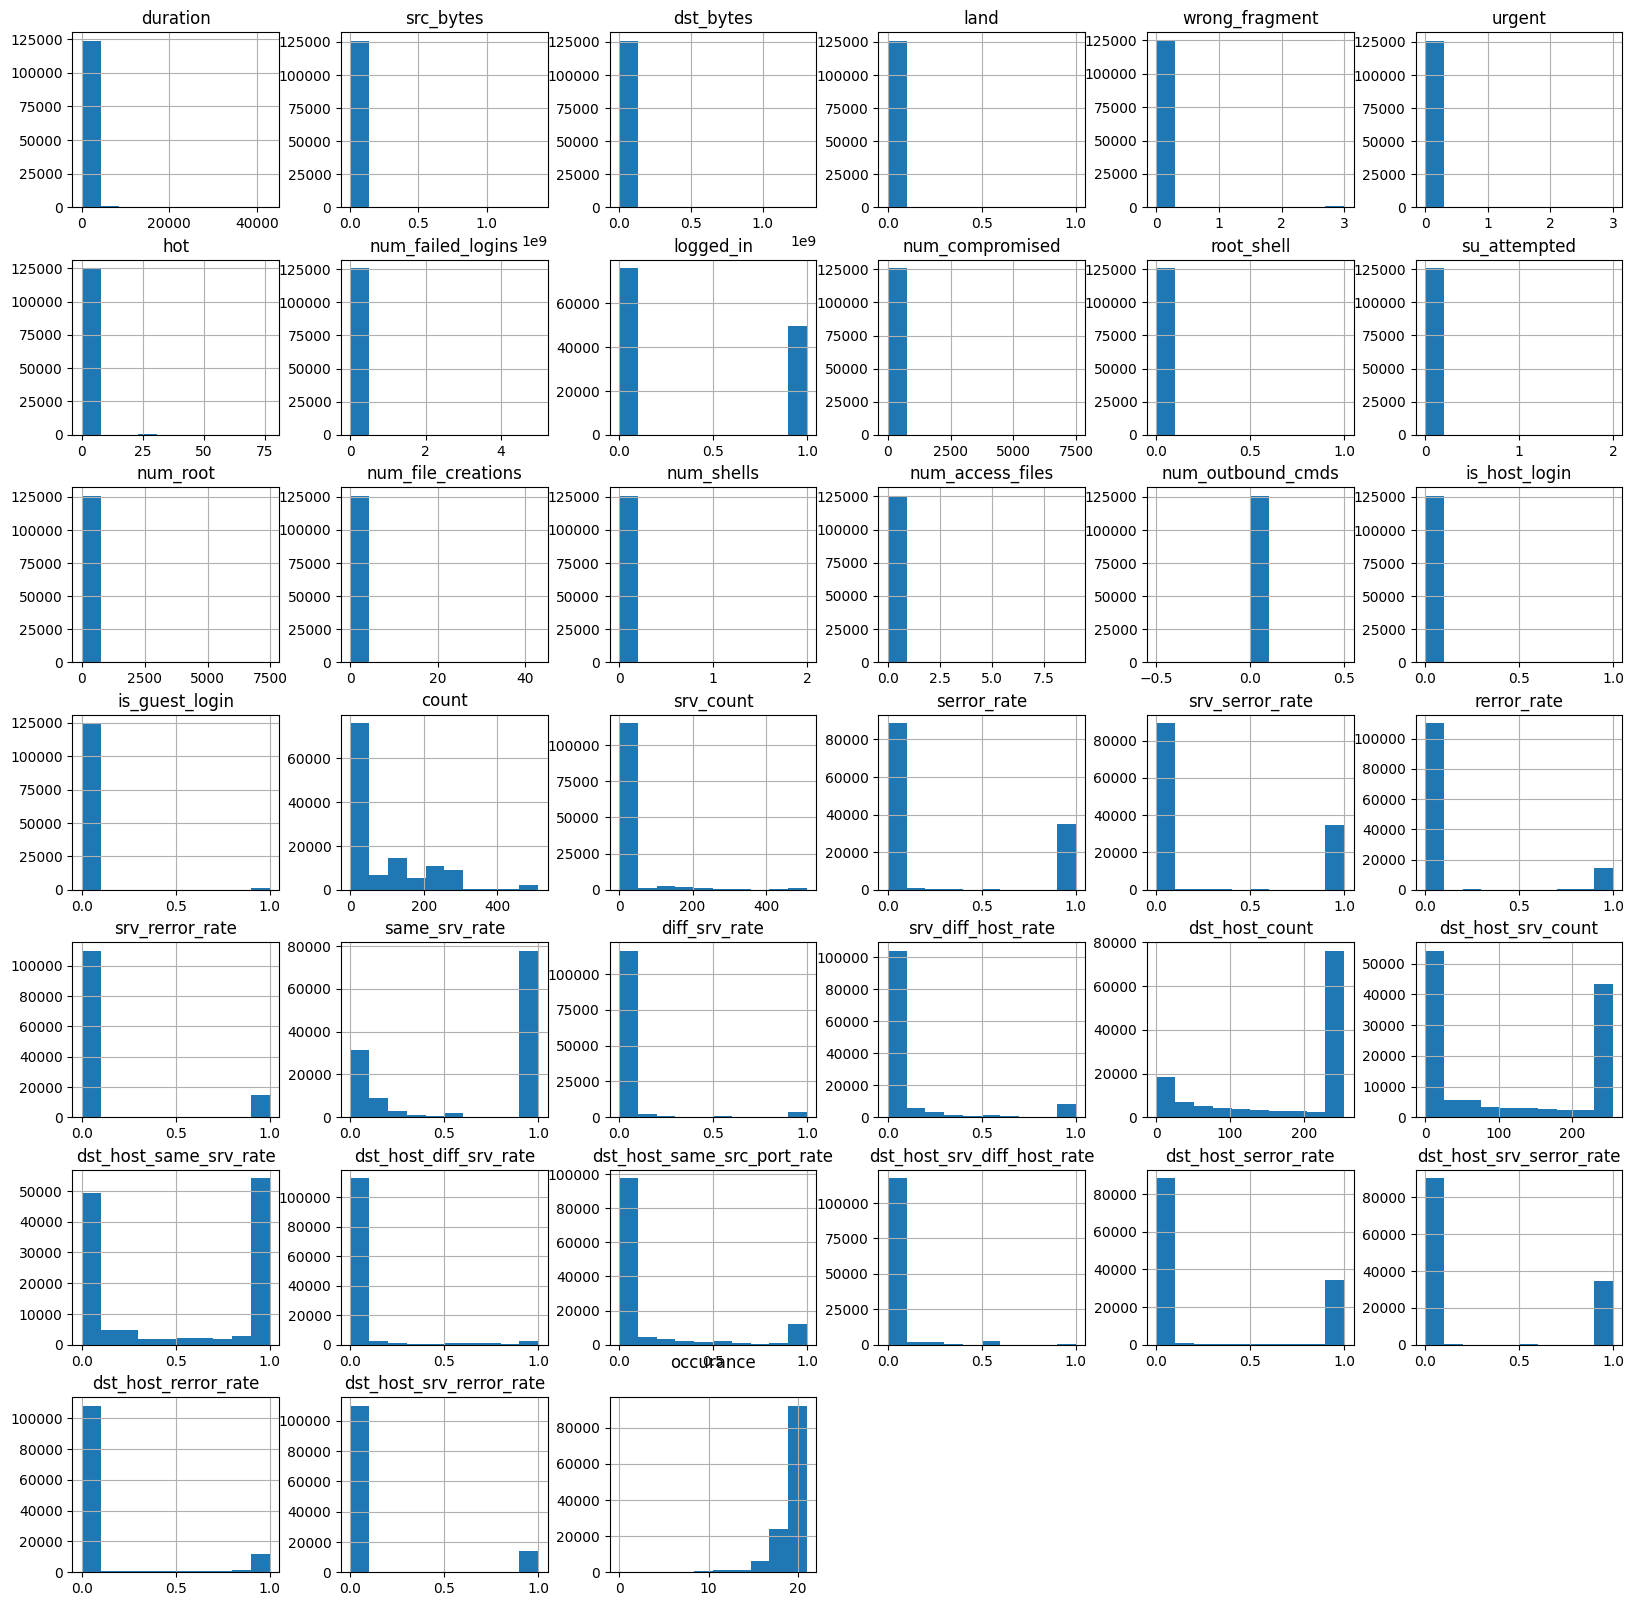

In [8]:
# Plot histograms of each column
dataset.hist(figsize=(20, 20))
plt.show()

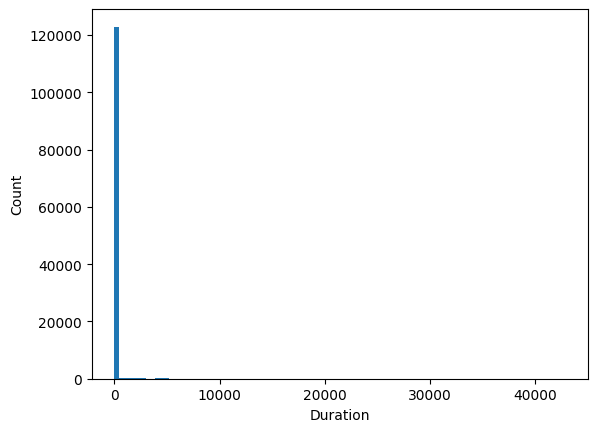

In [9]:

# Plot a histogram of the duration feature
plt.hist(dataset['duration'], bins=100)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()


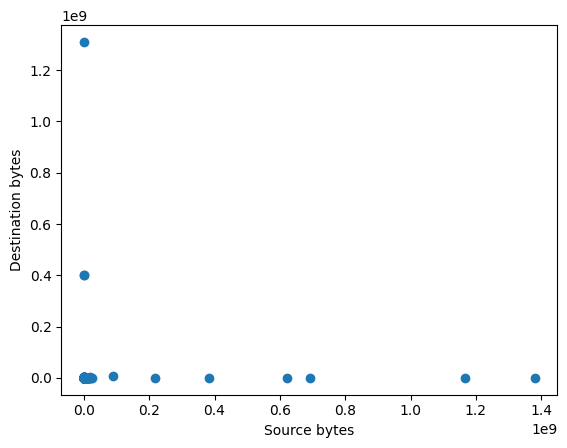

In [10]:

# Plot a scatter plot of the src_bytes and dst_bytes features
plt.scatter(dataset['src_bytes'], dataset['dst_bytes'])
plt.xlabel('Source bytes')
plt.ylabel('Destination bytes')
plt.show()


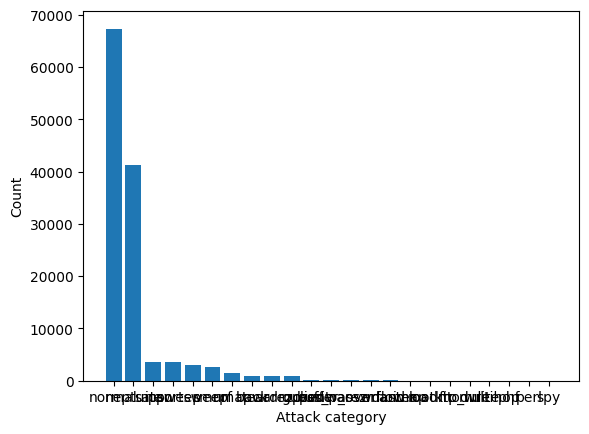

In [11]:

# Plot a bar chart of the attack categories
plt.bar(dataset['attack_category'].value_counts().index, dataset['attack_category'].value_counts().values)
plt.xlabel('Attack category')
plt.ylabel('Count')
plt.show()


# 2. Perform data preprocessing on the dataset by cleaning the data, handling missing values, outliers, and feature scaling.

In [12]:
# Check for missing values
print(dataset.isnull().sum())


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:

# Drop any rows with missing values
dataset.dropna(inplace=True)


<Axes: >

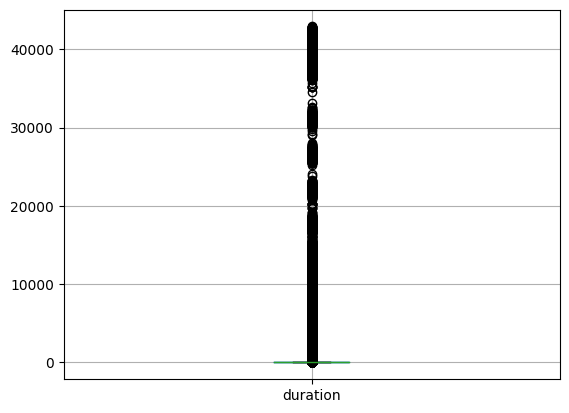

In [14]:

# Check for outliers in the duration feature using boxplot
dataset.boxplot(column=['duration'])


In [15]:

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
numerical_features = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
                      'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 
                      'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
                      'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                      'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
                      'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


In [16]:
print(dataset.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance\n'],
      dtype='object')


In [17]:
# Select the numeric columns to scale
numeric_cols = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
                'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
                'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 
                'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# Scale the selected columns
scaler = StandardScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])


# 3. The dataset provided to you contains 23 different classes (attack types). You need toconvert it to 5-classes

In [18]:
# Define the mapping from the 23 classes to the 5 classes
attack_mapping = {
    'normal': 'normal',
    'back': 'dos',
    'land': 'dos',
    'pod': 'dos',
    'neptune': 'dos',
    'smurf': 'dos',
    'teardrop': 'dos',
    'apache2': 'dos',
    'udpstorm': 'dos',
    'processtable': 'dos',
    'mailbomb': 'dos',
    'satan': 'probe',
    'ipsweep': 'probe',
    'nmap': 'probe',
    'portsweep': 'probe',
    'mscan': 'probe',
    'saint': 'probe',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'multihop': 'r2l',
    'phf': 'r2l',
    'spy': 'r2l',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
    'snmpgetattack': 'dos',
    'named': 'r2l',
    'xlock': 'r2l',
    'xsnoop': 'r2l',
    'snmpguess': 'r2l',
    'worm': 'r2l',
    'buffer_overflow': 'u2r',
    'loadmodule': 'u2r',
    'perl': 'u2r',
    'rootkit': 'u2r',
    'httptunnel': 'u2r',
    'ps': 'u2r',
    'sqlattack': 'u2r',
    'xterm': 'u2r'
}


In [19]:
# Replace the attack types in the DataFrame
dataset['attack_category'] = dataset['attack_category'].replace(attack_mapping)

# 4. Identify the most relevant features for classification using technique such as correlation analysis.

<Axes: >

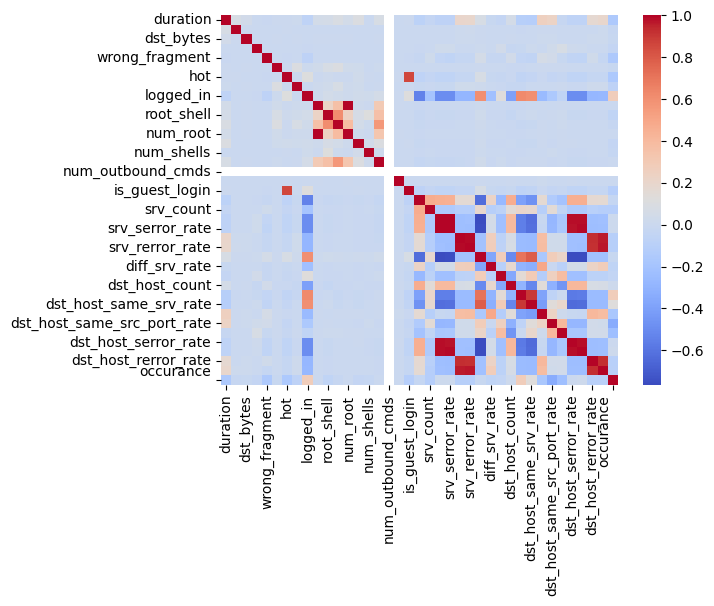

In [20]:
# calculate the correlation matrix
corr_matrix = dataset.corr()

# plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)


# 5. The next step is to use the updated dataset for classification. Use the following algorithm to perform classification.

In [42]:
# Save the preprocessed dataset to a new CSV file
dataset.to_csv('new_dataset.csv', index=False)

# b. Classification of Cyber Attacks Using K-Nearest Neighbors Algorithm

In [45]:
# load the dataset
dataset = pd.read_csv("new_dataset.csv")

In [24]:
# separate the features and the target
X = dataset.drop(["attack_category"], axis=1)
y = dataset["attack_category"]

In [25]:
# encode categorical variables
le = LabelEncoder()
X["protocol_type"] = le.fit_transform(X["protocol_type"])
X["service"] = le.fit_transform(X["service"])
X["flag"] = le.fit_transform(X["flag"])

In [26]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# impute missing values
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [28]:
# train the KNN classifier
best_accuracy = 0
best_k = 0
for k in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print("Best k:", best_k)
print("Best accuracy:", best_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best k: 1
Best accuracy: 0.9984520738241714


In [29]:
# evaluate performance for different k values
accuracies = []
for k in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

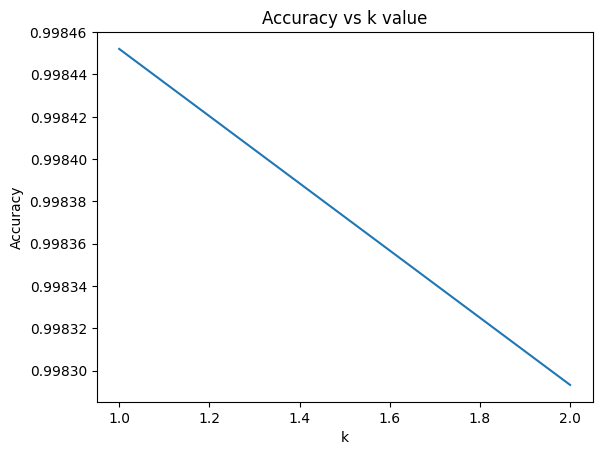

In [31]:
# plot the accuracy vs k graph
import matplotlib.pyplot as plt
plt.plot(range(1, 3), accuracies)
plt.title('Accuracy vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


# a. Classification of Cyber Attacks Using Decision Tree Algorithm A decision tree algorithm will be used to develop a classification model. The model will be trained on the preprocessed dataset and its performance will be evaluated using appropriate metrics such as accuracy, precision, recall, and F1 score.

In [32]:
# Load the dataset
dataset = pd.read_csv("new_dataset.csv")

# Separate the features and the target
X = dataset.drop(["attack_category"], axis=1)
y = dataset["attack_category"]

In [33]:
# Encode categorical features
encoder = LabelEncoder()
X["protocol_type"] = encoder.fit_transform(X["protocol_type"])
X["service"] = encoder.fit_transform(X["service"])
X["flag"] = encoder.fit_transform(X["flag"])

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Impute missing values
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [36]:
# Train the decision tree model
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=10)
dtc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtc_model.predict(X_test)

In [37]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Output evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1-score: 0.97


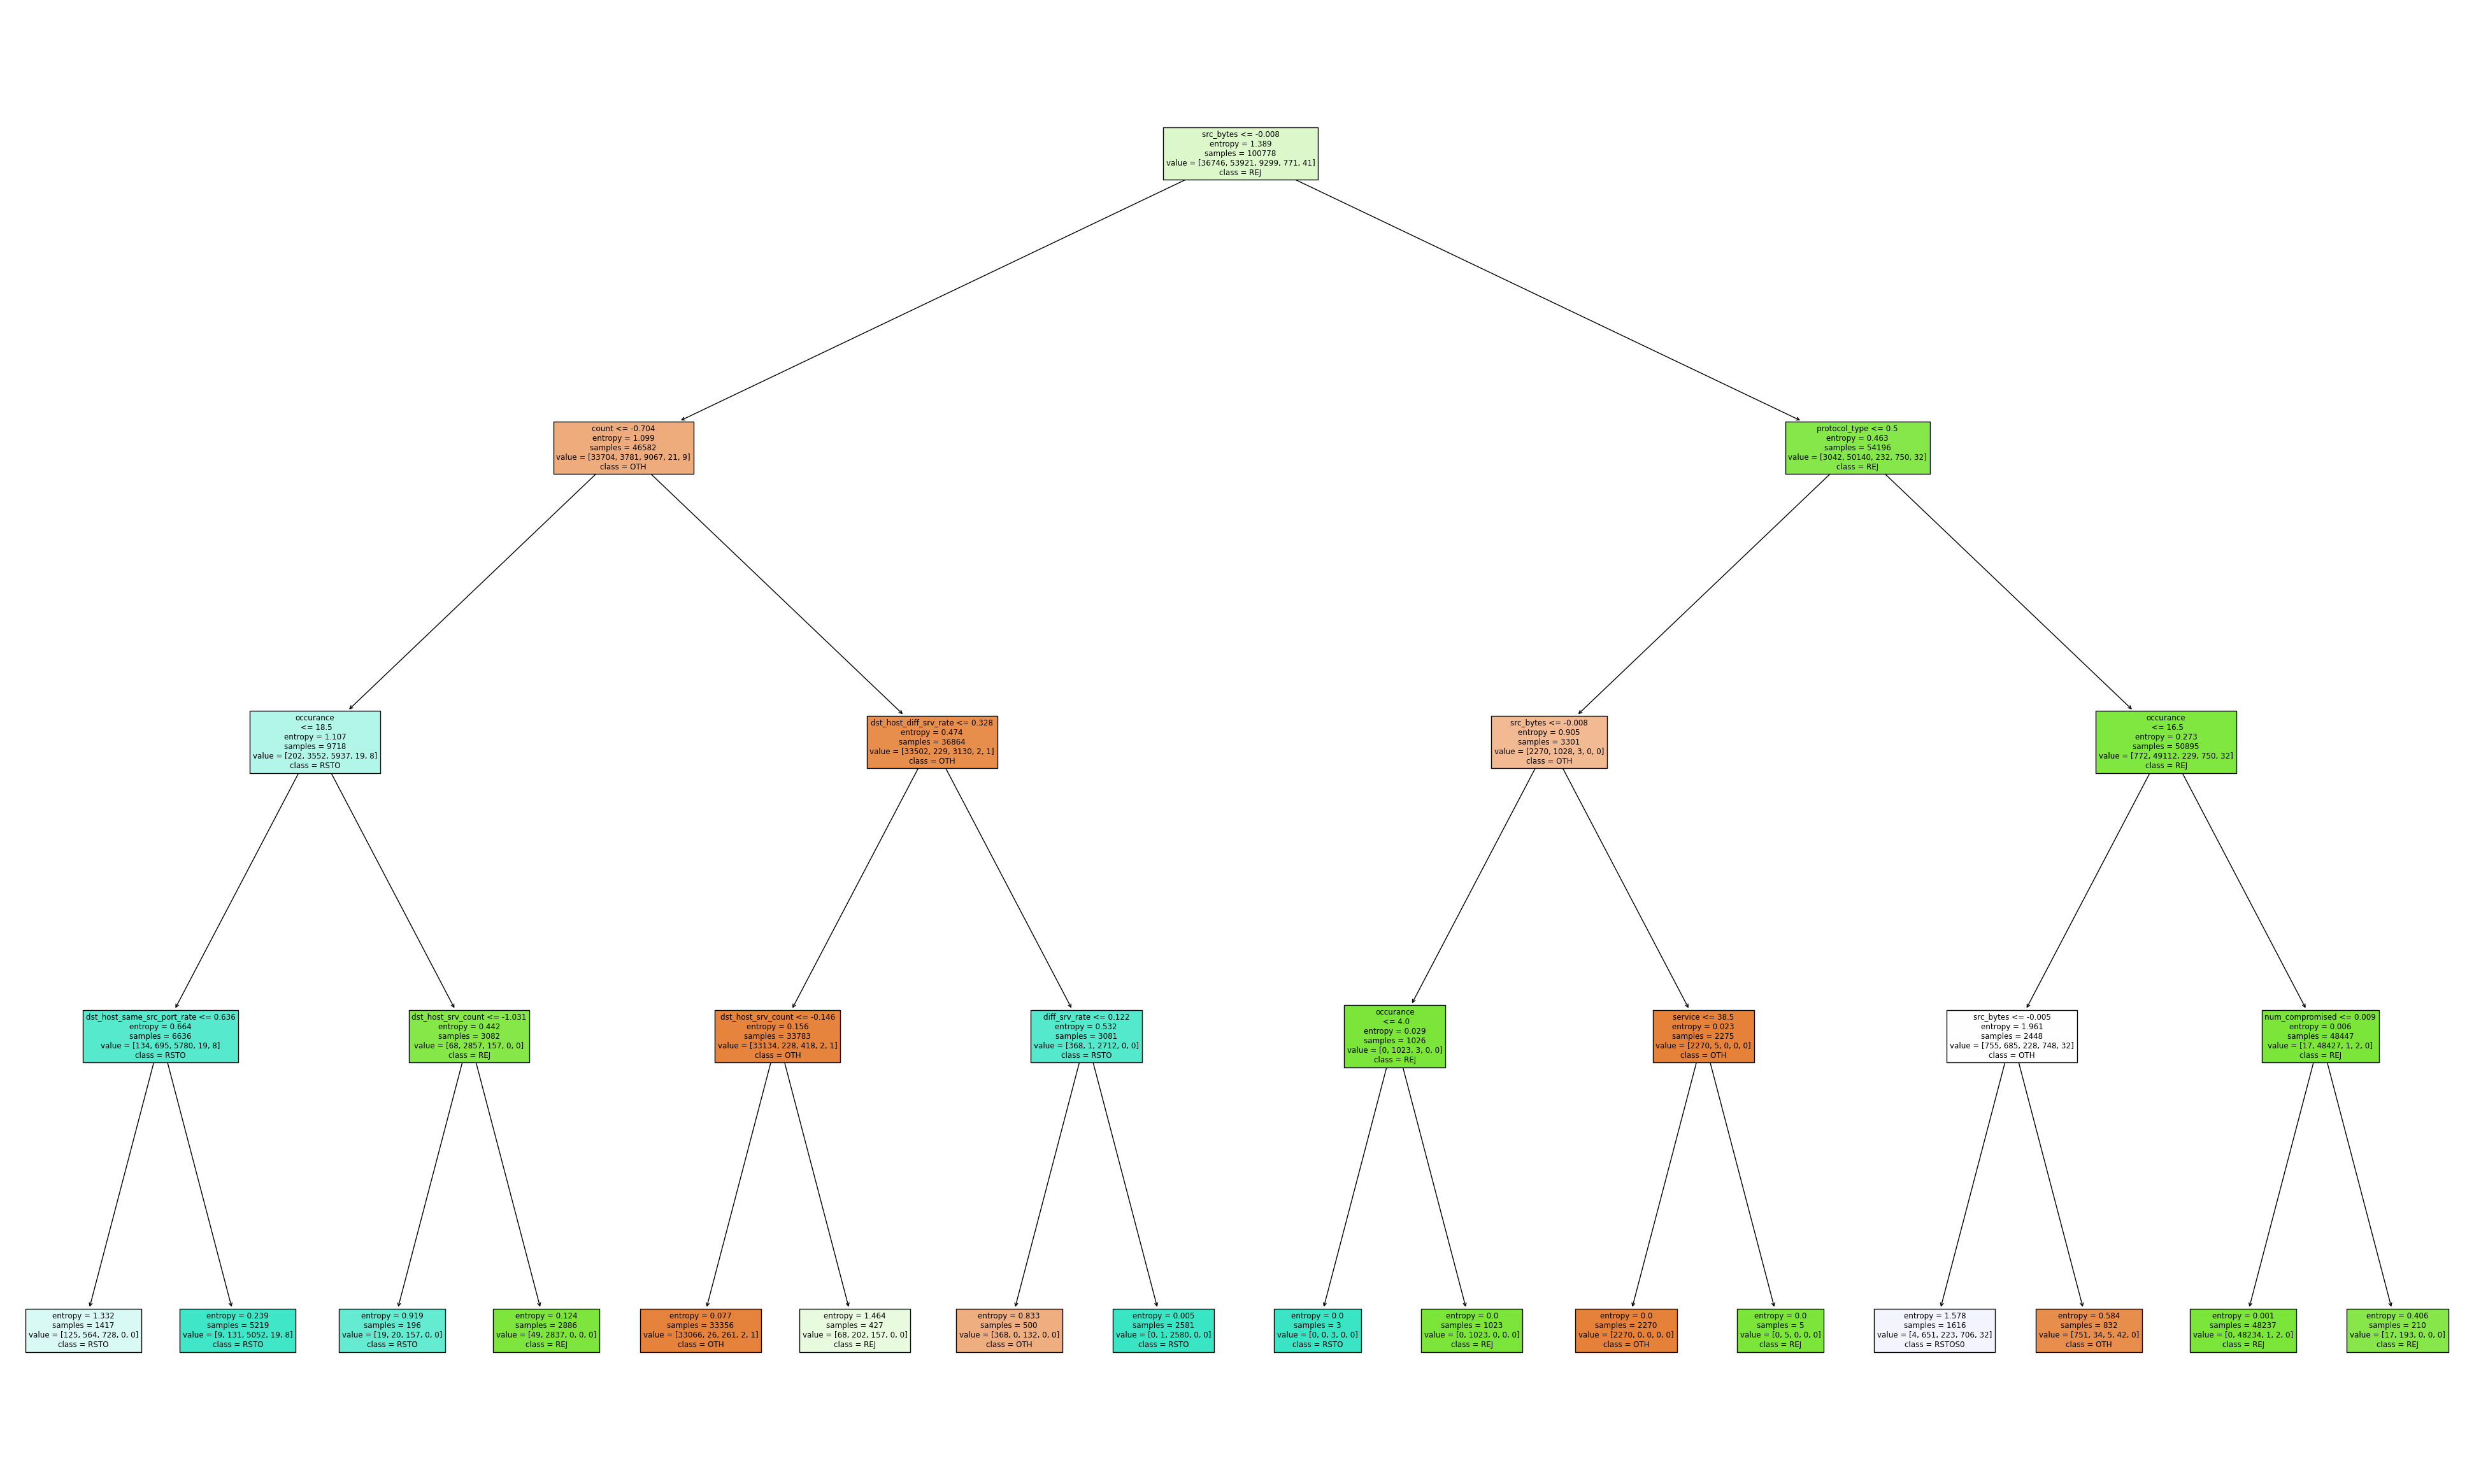

In [39]:
# Plot the decision tree
plt.figure(figsize=(50,30))
plot_tree(dtc_model, filled=True, feature_names=X.columns, class_names=encoder.classes_)
plt.show()


# c. Classification of Cyber Attacks Using Artificial Neural Networks (ANN)

In [48]:
# dataset = dataset.reset_index(drop=True)
# dataset = dataset.drop('attack_category', axis=1)

In [49]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance\n
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,20
1,-0.110249,udp,other,SF,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,15
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,19
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,0,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,21
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,0,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,20
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,0,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,21
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,0,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,18
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,20


In [50]:
# Encode categorical features
encoder = LabelEncoder()
dataset["protocol_type"] = encoder.fit_transform(dataset["protocol_type"])
dataset["service"] = encoder.fit_transform(dataset["service"])
dataset["flag"] = encoder.fit_transform(dataset["flag"])

In [52]:
scaler = StandardScaler()
scale = scaler.fit_transform(dataset)
X = pd.DataFrame(scale, columns=dataset.columns)
relevant_features = X[['occurance\n', 'duration']]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='occurance\n', ylabel='duration'>

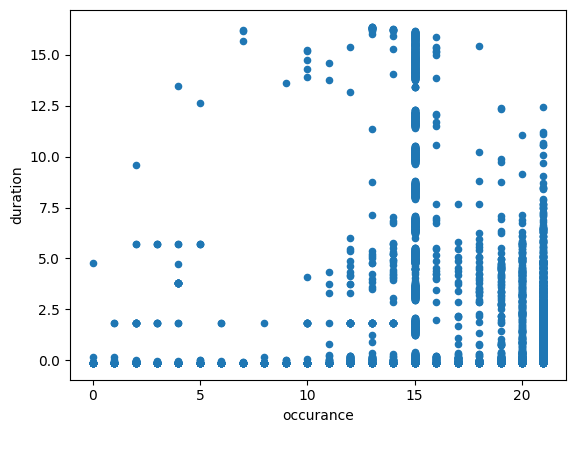

In [53]:
dataset.plot(kind='scatter',x='occurance\n',y='duration') # scatter plot

In [54]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(relevant_features)

KMeans(n_clusters=4, random_state=0)

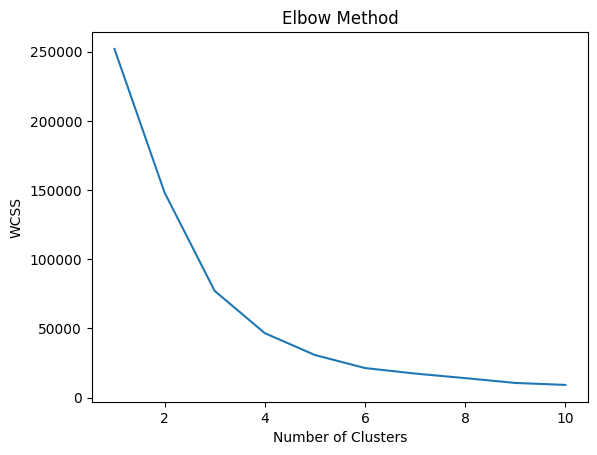

In [56]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(relevant_features)
    labels = kmeans.labels_
    # Add the cluster labels to the DataFrame
    dataset['cluster_label'] = labels
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

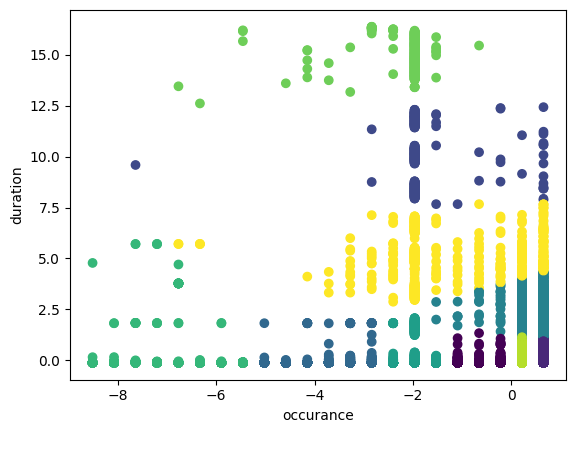

In [57]:
# Visualize the resulting clusters using a scatter plot
plt.scatter(relevant_features['occurance\n'], relevant_features['duration'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('occurance\n')
plt.ylabel('duration')
plt.show()

In [58]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance\n,cluster_label
0,-0.110249,1,20,9,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,20,8
1,-0.110249,2,44,9,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,15,5
2,-0.110249,1,49,5,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,19,0
3,-0.110249,1,24,9,-0.007723,-0.002891,0,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,21,1
4,-0.110249,1,24,9,-0.007728,-0.004814,0,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,1,49,5,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,20,8
125969,-0.107178,2,49,9,-0.007744,-0.004883,0,-0.089486,-0.007736,-0.095076,...,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,21,1
125970,-0.110249,1,54,9,-0.007382,-0.004823,0,-0.089486,-0.007736,-0.095076,...,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,18,0
125971,-0.110249,1,30,5,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,20,8


In [59]:
dataset['cluster_label'].unique()

array([8, 5, 0, 1, 4, 3, 2, 9, 6, 7])

In [60]:
# Scale the 'Occurance' and 'Duration' numerical features
scaler = StandardScaler()
scale = scaler.fit_transform(dataset)

In [61]:
# Separate the features and the target
X = dataset.drop(["cluster_label"], axis=1)
y = dataset["cluster_label"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Initialize the multilayer perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the classifier on the training set
mlp.fit(X_train, y_train)

# Predict the labels of the testing set
y_pred = mlp.predict(X_test)

# Evaluate the performance of the classifier on the testing set
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9986505258979956
